<a href="https://colab.research.google.com/github/suchanya-pangam/670510749-229352-StatisticalLearning-or-Statistical-Learning-Labs./blob/main/229351_LAB10_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ปฏิบัติการครั้งที่ 8

ดาวน์โหลดข้อมูลอุณหภูมิสูงสุดรายวันปี 1998-2019 จาก link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/CM_temp.csv

1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน
2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 24 เดือนสุดท้ายและ Training set เป็นข้อมูลก่อนหน้าทั้งหมด
3. ลองสร้างโมเดล Holt-Winters แบบต่างๆ (damped, non-damped, additive, multiplicative etc.) แล้วระบุโมเดลที่ดีที่ให้ค่า RMSE บน test set น้อยที่สุด
4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

In [36]:
!wget -O CM_temp.csv https://donlapark.pages.dev/229351/data/CM_temp.csv

--2025-09-17 08:21:40--  https://donlapark.pages.dev/229351/data/CM_temp.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139473 (136K) [text/csv]
Saving to: ‘CM_temp.csv’

CM_temp.csv         100%[===================>] 136.20K  --.-KB/s    in 0.003s  

2025-09-17 08:21:40 (45.6 MB/s) - ‘CM_temp.csv’ saved [139473/139473]



In [37]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime

In [38]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
def parser(dates):
  return datetime.strptime(dates, '%Y-%m-%d')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],
                                        index_col='Date',
                                        date_parser=parser)

data.tail()

/tmp/ipython-input-2705365328.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],


,MaxTemp
Date,
2019-07-27,26.2
2019-07-28,34.2
2019-07-29,34.4
2019-07-30,33.5
2019-07-31,30.7


ข้อมูลที่ได้เป็นข้อมูลรายวัน ทำการหาค่าเฉลี่ยรายเดือนด้วย method `resample`

In [39]:
data_monthly = data['MaxTemp'].resample("M").mean()

data_monthly.head()

/tmp/ipython-input-3219926365.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data['MaxTemp'].resample("M").mean()


,MaxTemp
Date,
1998-01-31,31.687097
1998-02-28,33.685714
1998-03-31,37.103226
1998-04-30,37.910000
1998-05-31,35.848387


In [40]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 24 เดือนสุดท้ายและ Training set เป็นข้อมูลก่อนหน้าทั้งหมด

In [41]:
Test_set= data_monthly[-24:]
Training_set = data_monthly[:-24]
print(Test_set)
print(Training_set)

Date
2017-08-31    32.764516
2017-09-30    33.140000
2017-10-31    32.158065
2017-11-30    31.616667
2017-12-31    29.229032
2018-01-31    30.048387
2018-02-28    33.253571
2018-03-31    35.674194
2018-04-30    35.900000
2018-05-31    34.648387
2018-06-30    33.066667
2018-07-31    32.000000
2018-08-31    32.258065
2018-09-30    33.506667
2018-10-31    32.864516
2018-11-30    32.336667
2018-12-31    30.229032
2019-01-31    30.622581
2019-02-28    34.564286
2019-03-31    37.051613
2019-04-30    39.716667
2019-05-31    37.680645
2019-06-30    35.466667
2019-07-31    34.070968
Freq: ME, Name: MaxTemp, dtype: float64
Date
1998-01-31    31.687097
1998-02-28    33.685714
1998-03-31    37.103226
1998-04-30    37.910000
1998-05-31    35.848387
                ...    
2017-03-31    37.032258
2017-04-30    36.340000
2017-05-31    34.806452
2017-06-30    33.523333
2017-07-31    32.361290
Freq: ME, Name: MaxTemp, Length: 235, dtype: float64


ลองสร้างโมเดล Holt-Winters แบบต่างๆ (damped, non-damped, additive, multiplicative etc.) แล้วระบุโมเดลที่ดีที่ให้ค่า RMSE บน test set น้อยที่สุด

/tmp/ipython-input-2832432501.py:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(Training_set, trend = 'add', damped=True, seasonal=None, seasonal_periods=12)


RMSE: 2.7206000811236914


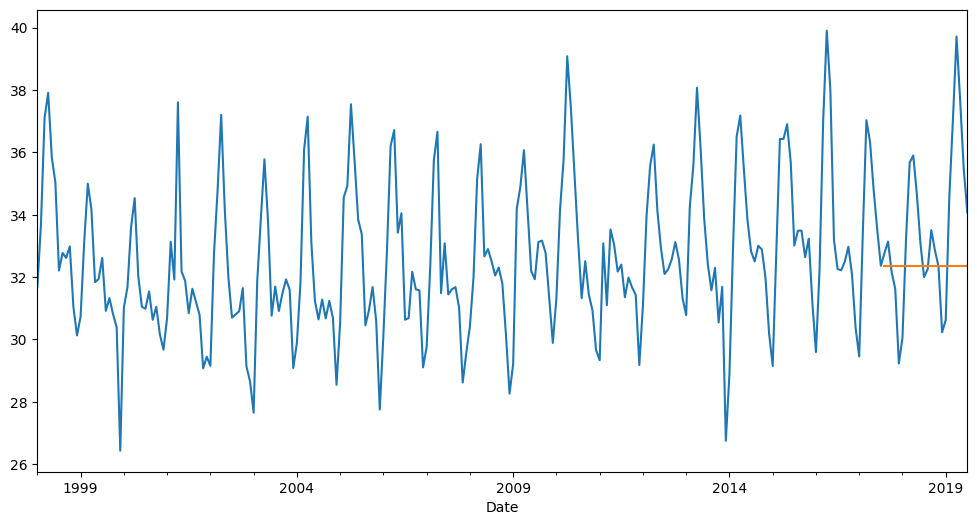

In [42]:
#(1)
es = ExponentialSmoothing(Training_set, trend = 'add', damped=True, seasonal=None, seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('2017-08-31', '2019-07-31')

print('RMSE:',rmse(Test_set,yhat))
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

/tmp/ipython-input-3018524894.py:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(Training_set, trend = 'add', damped=True, seasonal=None, seasonal_periods=12)


RMSE: 2.7206000811236914


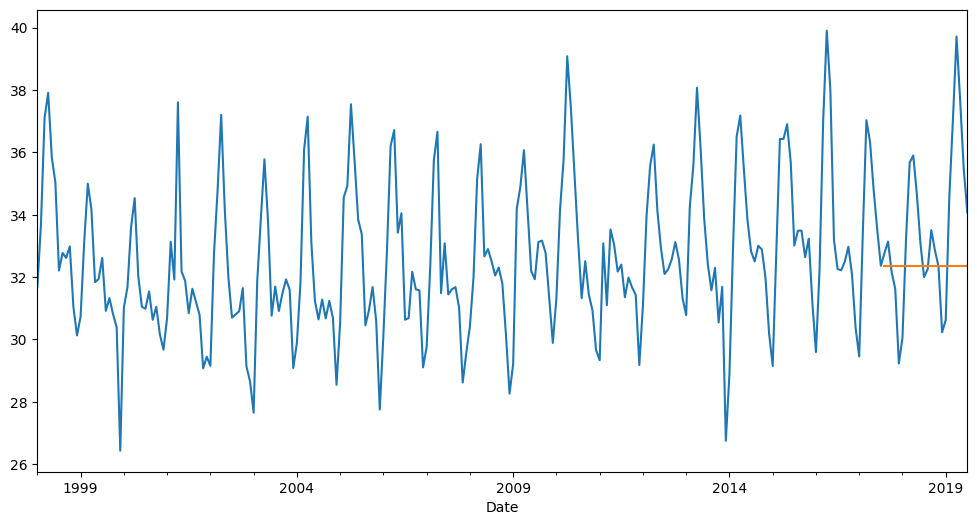

In [43]:
#(2)
es = ExponentialSmoothing(Training_set, trend = 'add', damped=True, seasonal=None, seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('2017-08-31', '2019-07-31')

print('RMSE:',rmse(Test_set,yhat))
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

/tmp/ipython-input-562058458.py:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(Training_set, trend = 'add', damped=True, seasonal='add', seasonal_periods=12)


RMSE: 1.1134955121933203


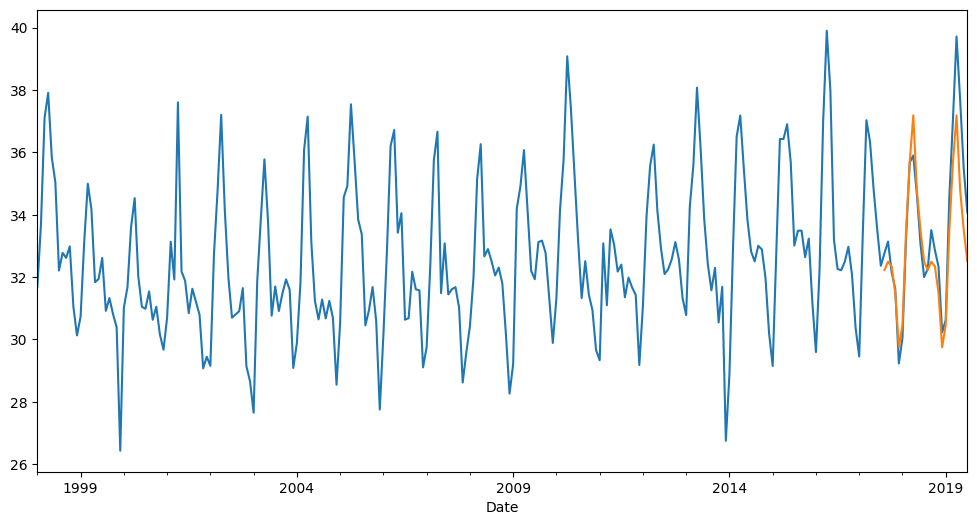

In [44]:
#(3)
es = ExponentialSmoothing(Training_set, trend = 'add', damped=True, seasonal='add', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('2017-08-31', '2019-07-31')

print('RMSE:',rmse(Test_set,yhat))
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

/tmp/ipython-input-3750542509.py:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(Training_set, trend = 'add', damped=True, seasonal='mul', seasonal_periods=12)


RMSE: 1.1062443526370112


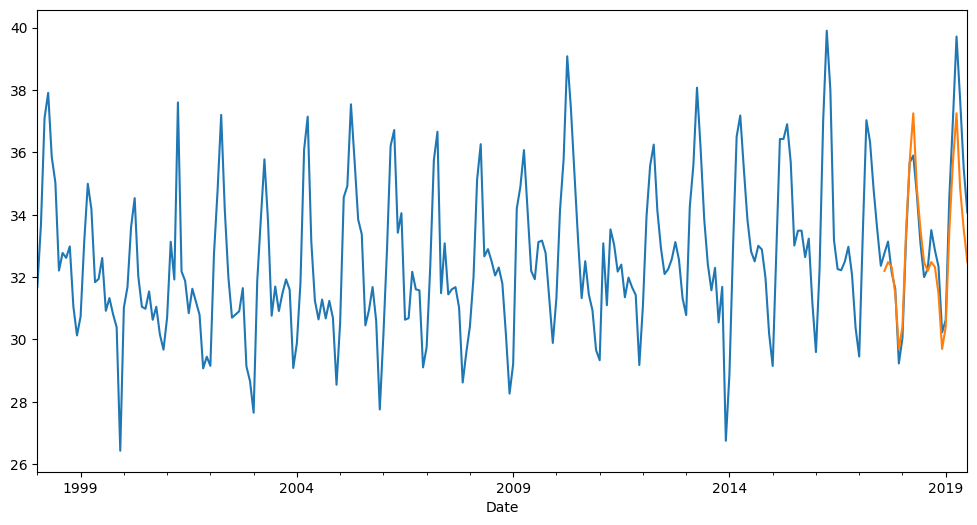

In [45]:
#(4)
es = ExponentialSmoothing(Training_set, trend = 'add', damped=True, seasonal='mul', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('2017-08-31', '2019-07-31')

print('RMSE:',rmse(Test_set,yhat))
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

/tmp/ipython-input-277828473.py:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(Training_set, trend = 'add', damped=False, seasonal='add', seasonal_periods=12)


RMSE: 1.1669523392712184


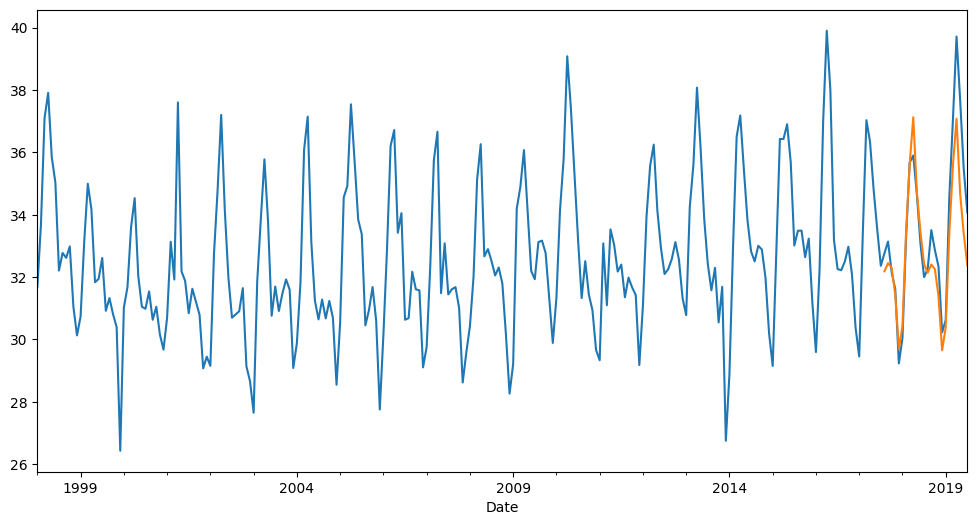

In [46]:
#(5)
es = ExponentialSmoothing(Training_set, trend = 'add', damped=False, seasonal='add', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('2017-08-31', '2019-07-31')

print('RMSE:',rmse(Test_set,yhat))
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

/tmp/ipython-input-126275591.py:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(Training_set, trend = 'mul', damped=False, seasonal='add', seasonal_periods=12)


RMSE: 1.1875960299599877


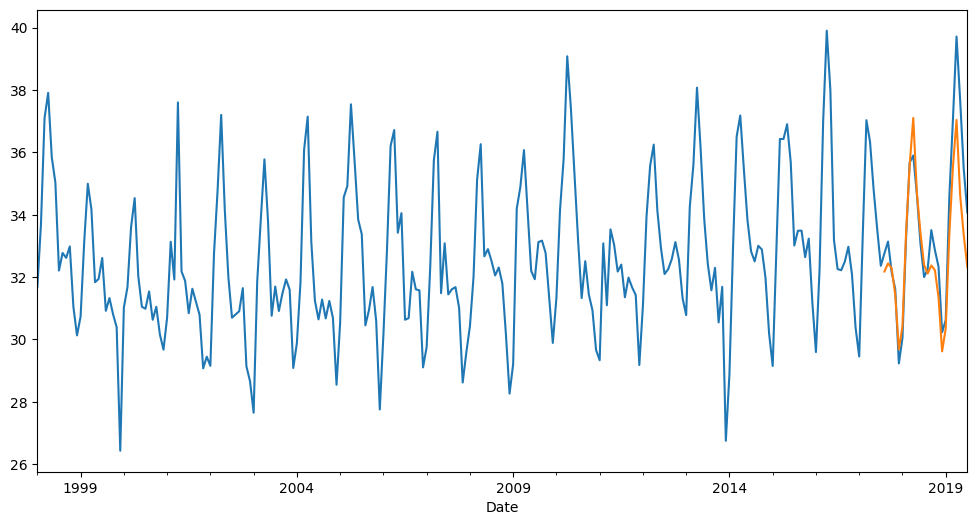

In [31]:
#(6)
es = ExponentialSmoothing(Training_set, trend = 'mul', damped=False, seasonal='add', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('2017-08-31', '2019-07-31')

print('RMSE:',rmse(Test_set,yhat))
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

/tmp/ipython-input-3032844735.py:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(Training_set, trend =None, damped=False, seasonal='add', seasonal_periods=12)


RMSE: 1.124286066564405


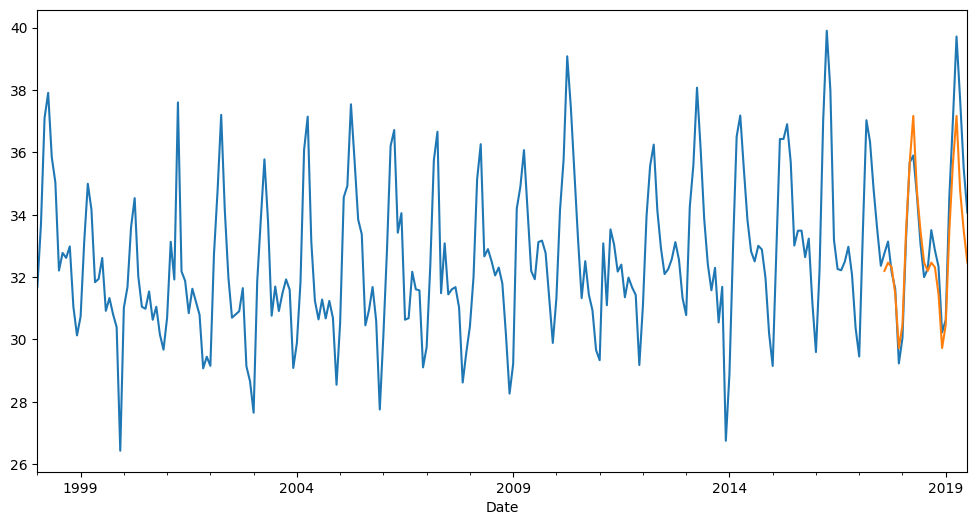

/tmp/ipython-input-3032844735.py:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(Training_set, trend =None, damped=False, seasonal='add', seasonal_periods=12)


RMSE: 1.124286066564405


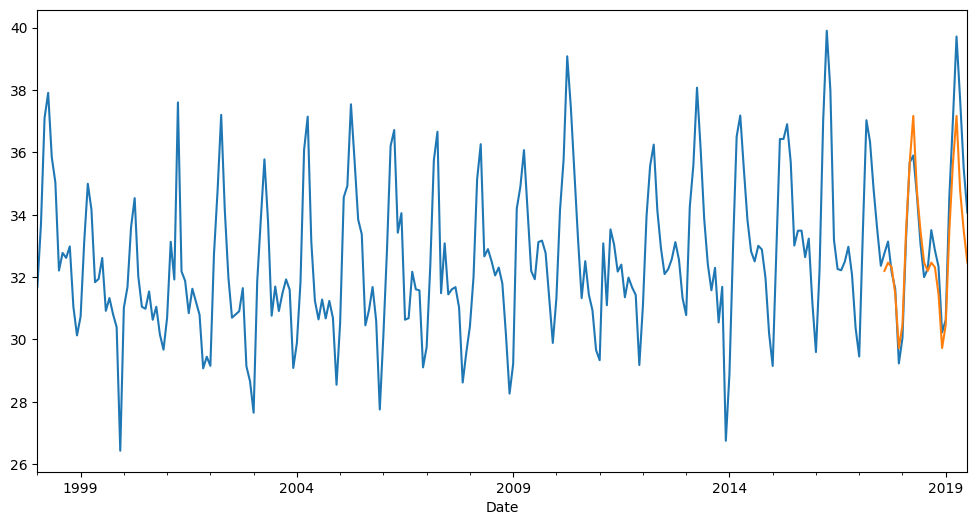

In [47]:
#(7)
es = ExponentialSmoothing(Training_set, trend =None, damped=False, seasonal='add', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('2017-08-31', '2019-07-31')

print('RMSE:',rmse(Test_set,yhat))
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

/tmp/ipython-input-1254482970.py:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(Training_set, trend = 'add', damped=False, seasonal='mul', seasonal_periods=12)


RMSE: 1.1639766564724707


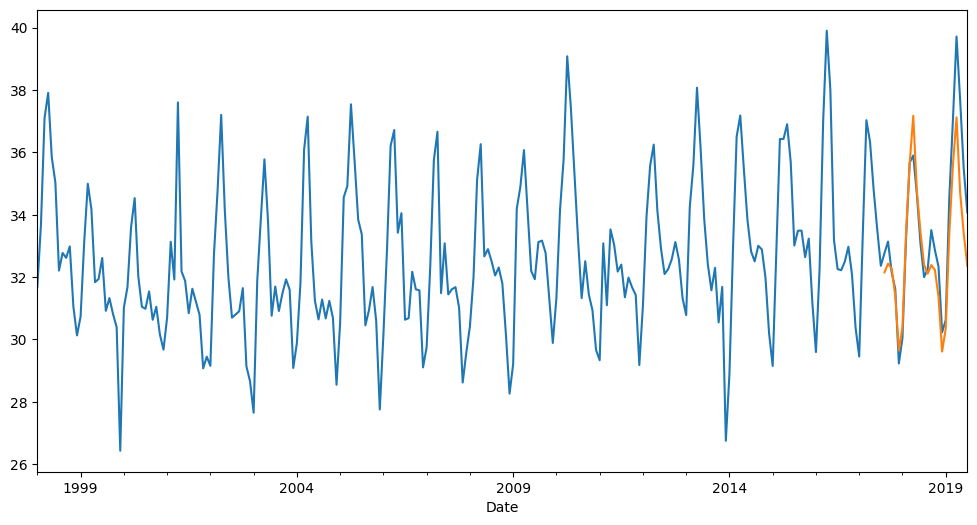

/tmp/ipython-input-1254482970.py:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(Training_set, trend = 'add', damped=False, seasonal='mul', seasonal_periods=12)


RMSE: 1.1639766564724707


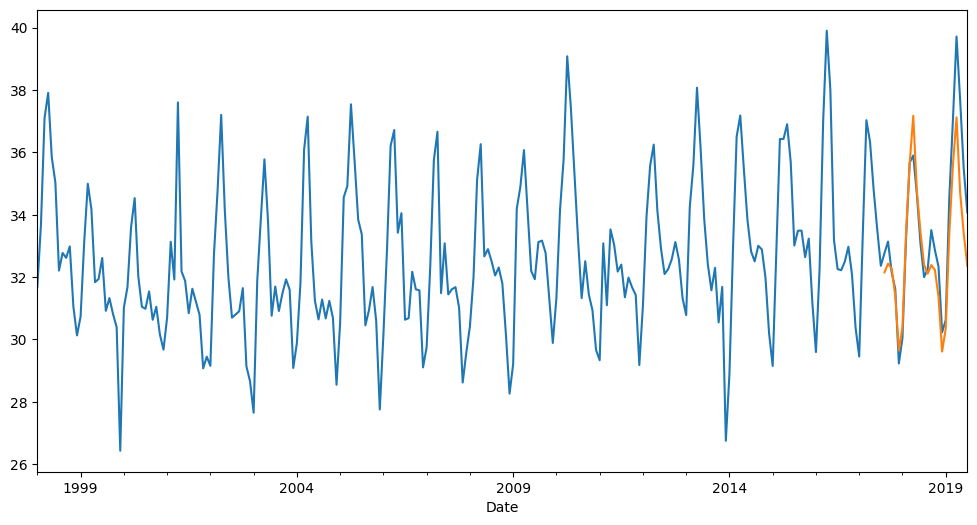

In [48]:
#(8)
es = ExponentialSmoothing(Training_set, trend = 'add', damped=False, seasonal='mul', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('2017-08-31', '2019-07-31')

print('RMSE:',rmse(Test_set,yhat))
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

/tmp/ipython-input-3642247315.py:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(Training_set, trend = 'add', damped=False, seasonal=None, seasonal_periods=12)


RMSE: 2.697261490836458


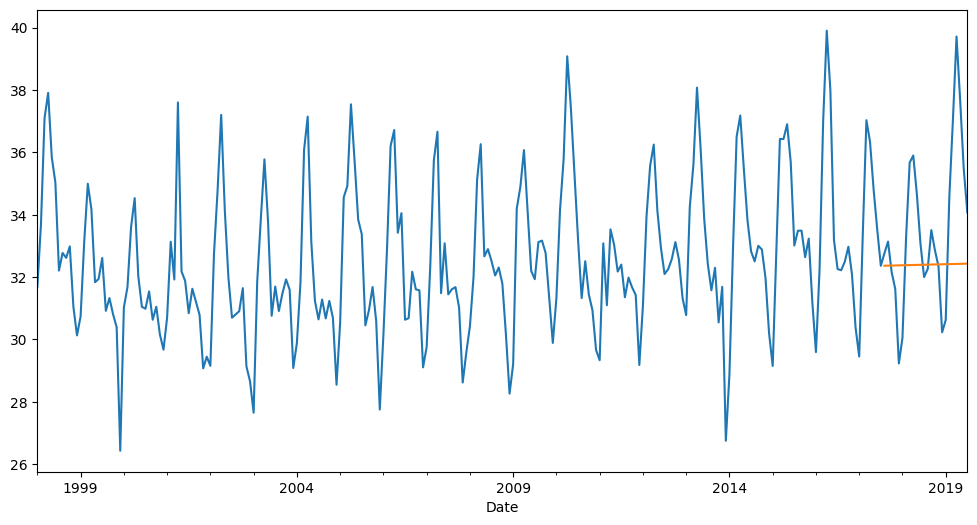

/tmp/ipython-input-3642247315.py:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(Training_set, trend = 'add', damped=False, seasonal=None, seasonal_periods=12)


RMSE: 2.697261490836458


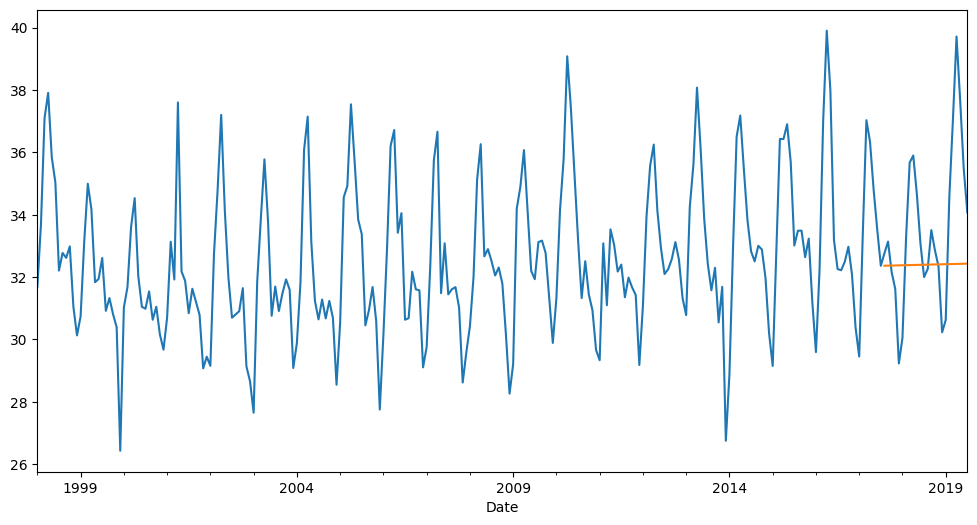

In [49]:
#(9)
es = ExponentialSmoothing(Training_set, trend = 'add', damped=False, seasonal=None, seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('2017-08-31', '2019-07-31')

print('RMSE:',rmse(Test_set,yhat))
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

/tmp/ipython-input-702237885.py:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(Training_set, trend = None, damped=False, seasonal='mul', seasonal_periods=12)


RMSE: 1.12003424586557


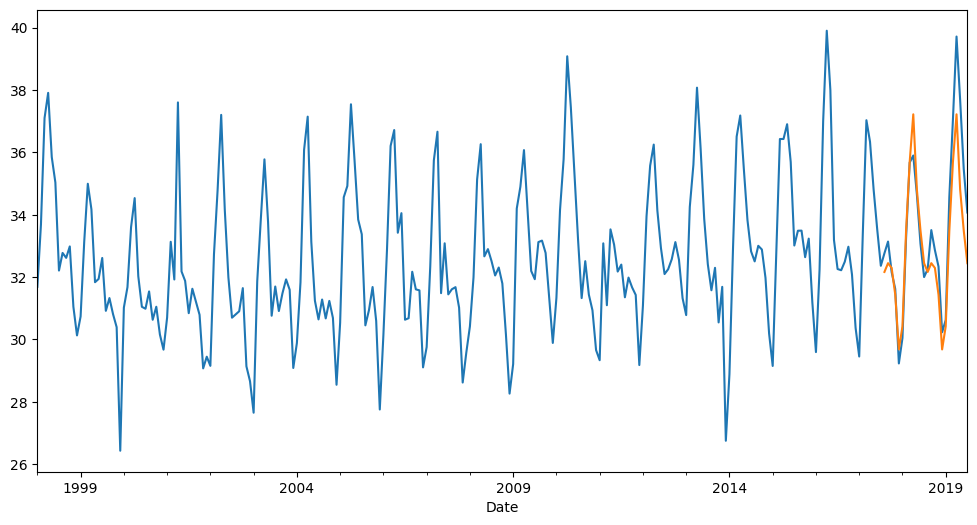

/tmp/ipython-input-702237885.py:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(Training_set, trend = None, damped=False, seasonal='mul', seasonal_periods=12)


RMSE: 1.12003424586557


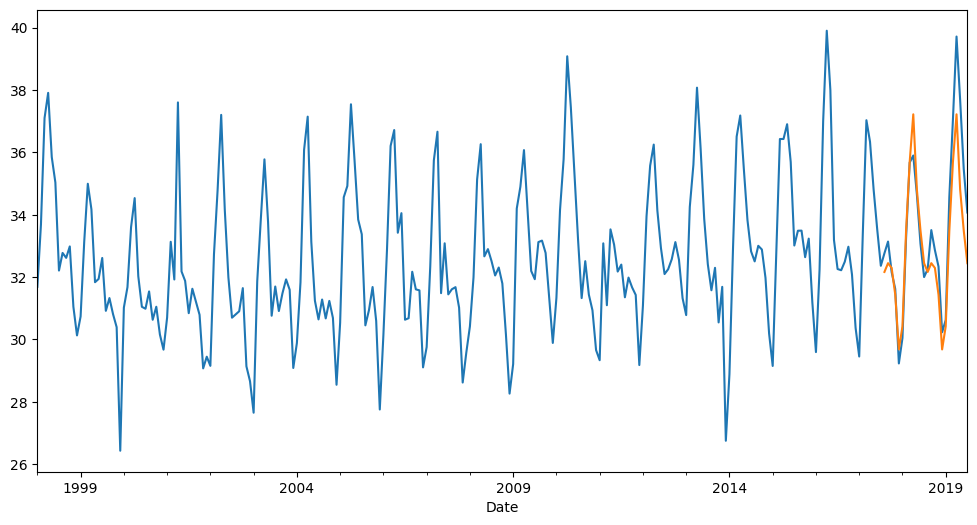

In [50]:
#(10)
es = ExponentialSmoothing(Training_set, trend = None, damped=False, seasonal='mul', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('2017-08-31', '2019-07-31')

print('RMSE:',rmse(Test_set,yhat))
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

/tmp/ipython-input-1406237695.py:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(Training_set, trend =None, damped=False, seasonal=None, seasonal_periods=12)


RMSE: 2.7206000811236914


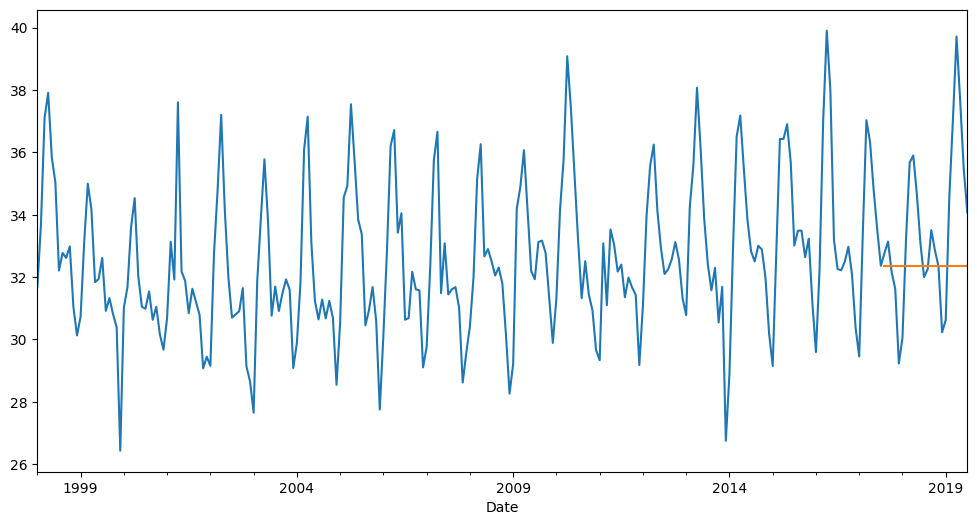

In [51]:
#(11)
es = ExponentialSmoothing(Training_set, trend =None, damped=False, seasonal=None, seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('2017-08-31', '2019-07-31')

print('RMSE:',rmse(Test_set,yhat))
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

/tmp/ipython-input-3350063846.py:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(Training_set, trend = 'mul', damped=False, seasonal=None, seasonal_periods=12)


RMSE: 3.2472538878024


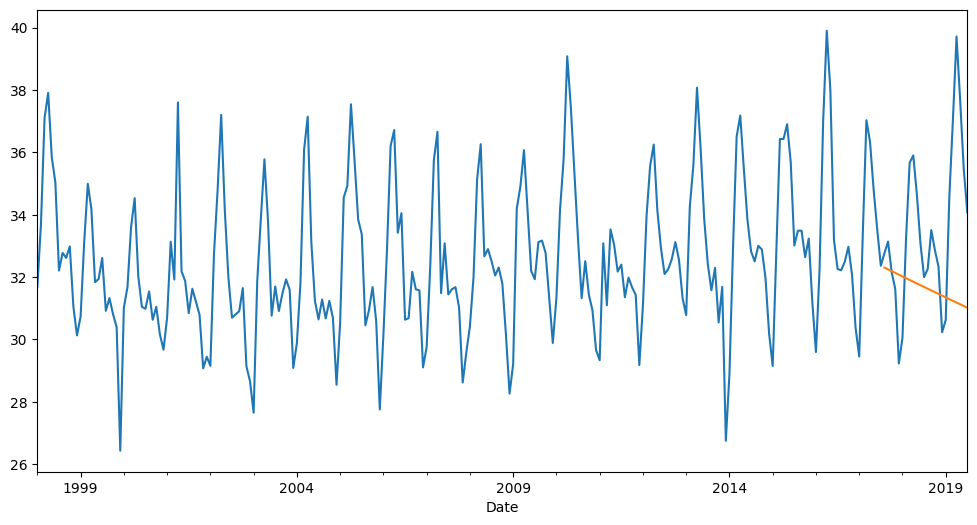

In [52]:
#(12)
es = ExponentialSmoothing(Training_set, trend = 'mul', damped=False, seasonal=None, seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('2017-08-31', '2019-07-31')

print('RMSE:',rmse(Test_set,yhat))
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

In [53]:
#list of parameters
es_fit.params

{'smoothing_level': np.float64(0.9999999850988388),
 'smoothing_trend': np.float64(0.0),
 'smoothing_seasonal': np.float64(nan),
 'damping_trend': nan,
 'initial_level': np.float64(31.74311997193231),
 'initial_trend': np.float64(0.9982350265464499),
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}